# Predicting Blood Pressure: A Machine Learning Approach with Random Forest and Ridge Regression

### Objective
The project aims to harness machine learning techniques to predict an individual's blood pressure, leveraging health indicators and lifestyle factors. This approach is crucial in healthcare, as high blood pressure is a significant risk factor for heart disease and stroke. Early identification of at-risk individuals can lead to timely interventions, potentially reducing the incidence of cardiovascular diseases.

### Hypothesis

The hypothesis is that a combination of personal, health, and lifestyle factors significantly influences blood pressure. Factors such as age, BMI, stress level, physical activity, and sleep quality are expected to have a noticeable impact on blood pressure levels.

### Data

The dataset consists of 374 entries with variables like Age, Gender, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleep Disorder. These comprehensive variables provide a holistic view of factors potentially influencing blood pressure.



#### Key Features of the Dataset
The dataset encompasses a wide range of variables that are believed to influence or correlate with blood pressure. The major categories of these variables include:

##### Personal and Demographic Information:

Person ID: Personal Identification.

Age: The age of the individual.

Gender: Gender, a binary variable.

##### Health and Medical Indicators:

Blood Pressure: Systolic and diastolic blood pressure readings.

Heart Rate: The resting heart rate.

BMI Category: The Body Mass Index (BMI) category.

Stress Level: Level of stress, 1 to 10.

##### Lifestyle and Occupational Data:

Physical Activity Level: A measure of daily or regular physical activity.

Daily Steps: The average number of steps taken per day.

Occupation: Categorical data representing various occupations, such as 'Nurse', 'Teacher', 'Doctor', and others.

##### Sleep-related Variables:

Sleep Duration: The typical duration of sleep per night.

Sleep Disorder: Information on sleep disorders like sleep apnea or insomnia.

Quality of Sleep: The rating of sleep quality.

## Exploratory Data Analysis

Initial data analysis revealed key insights. For instance, scatter plots between various factors like Age, BMI, and Blood Pressure indicated some relationships worth exploring. Understanding these patterns is crucial for model development.



In [1]:
import pandas as pd
import numpy as np
health_df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')



In [2]:
health_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
health_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


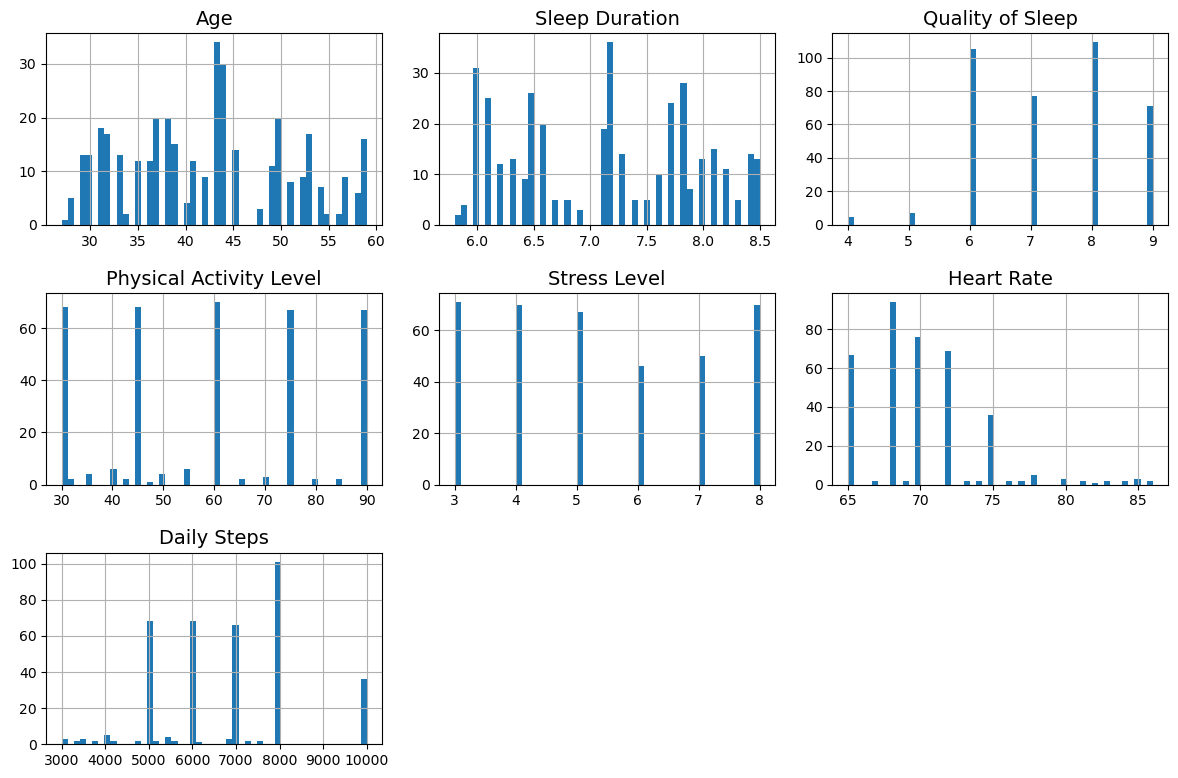

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

columns_to_plot = health_df.columns.drop('Person ID')

health_df[columns_to_plot].hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [6]:
health_df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
np.random.seed(42)

### Correlations between numerical variables

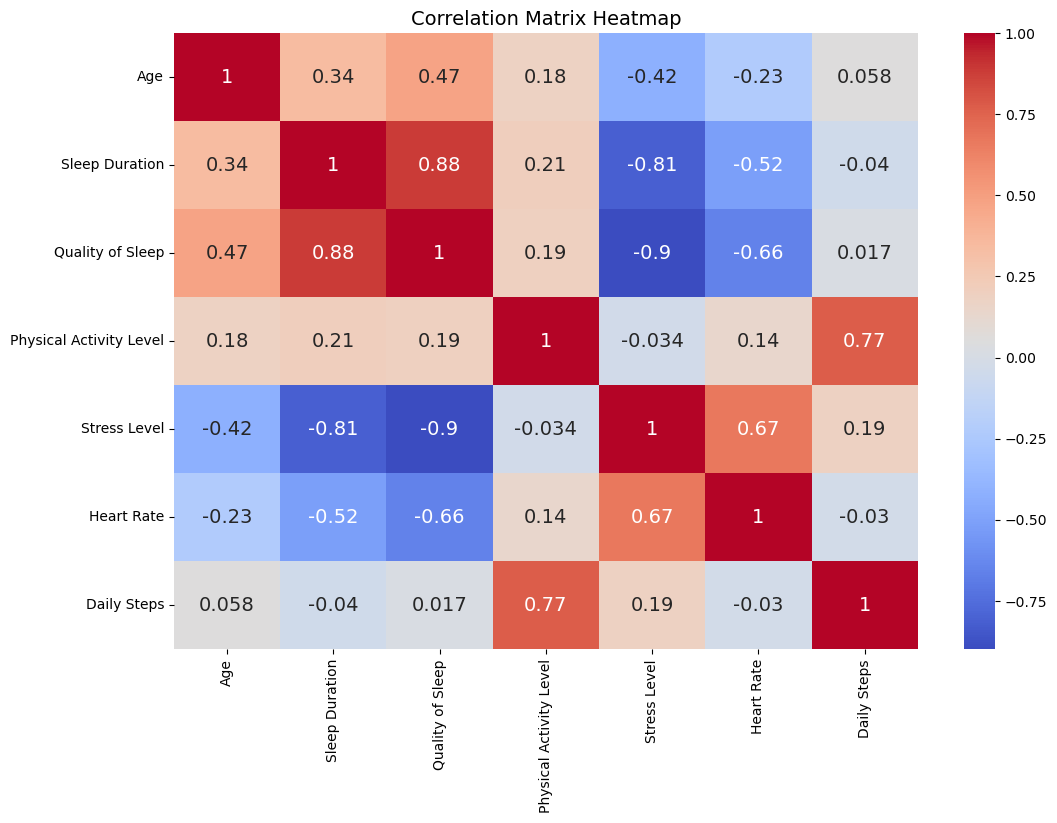

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = health_df[['Age', 'Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level','Heart Rate','Daily Steps']].corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

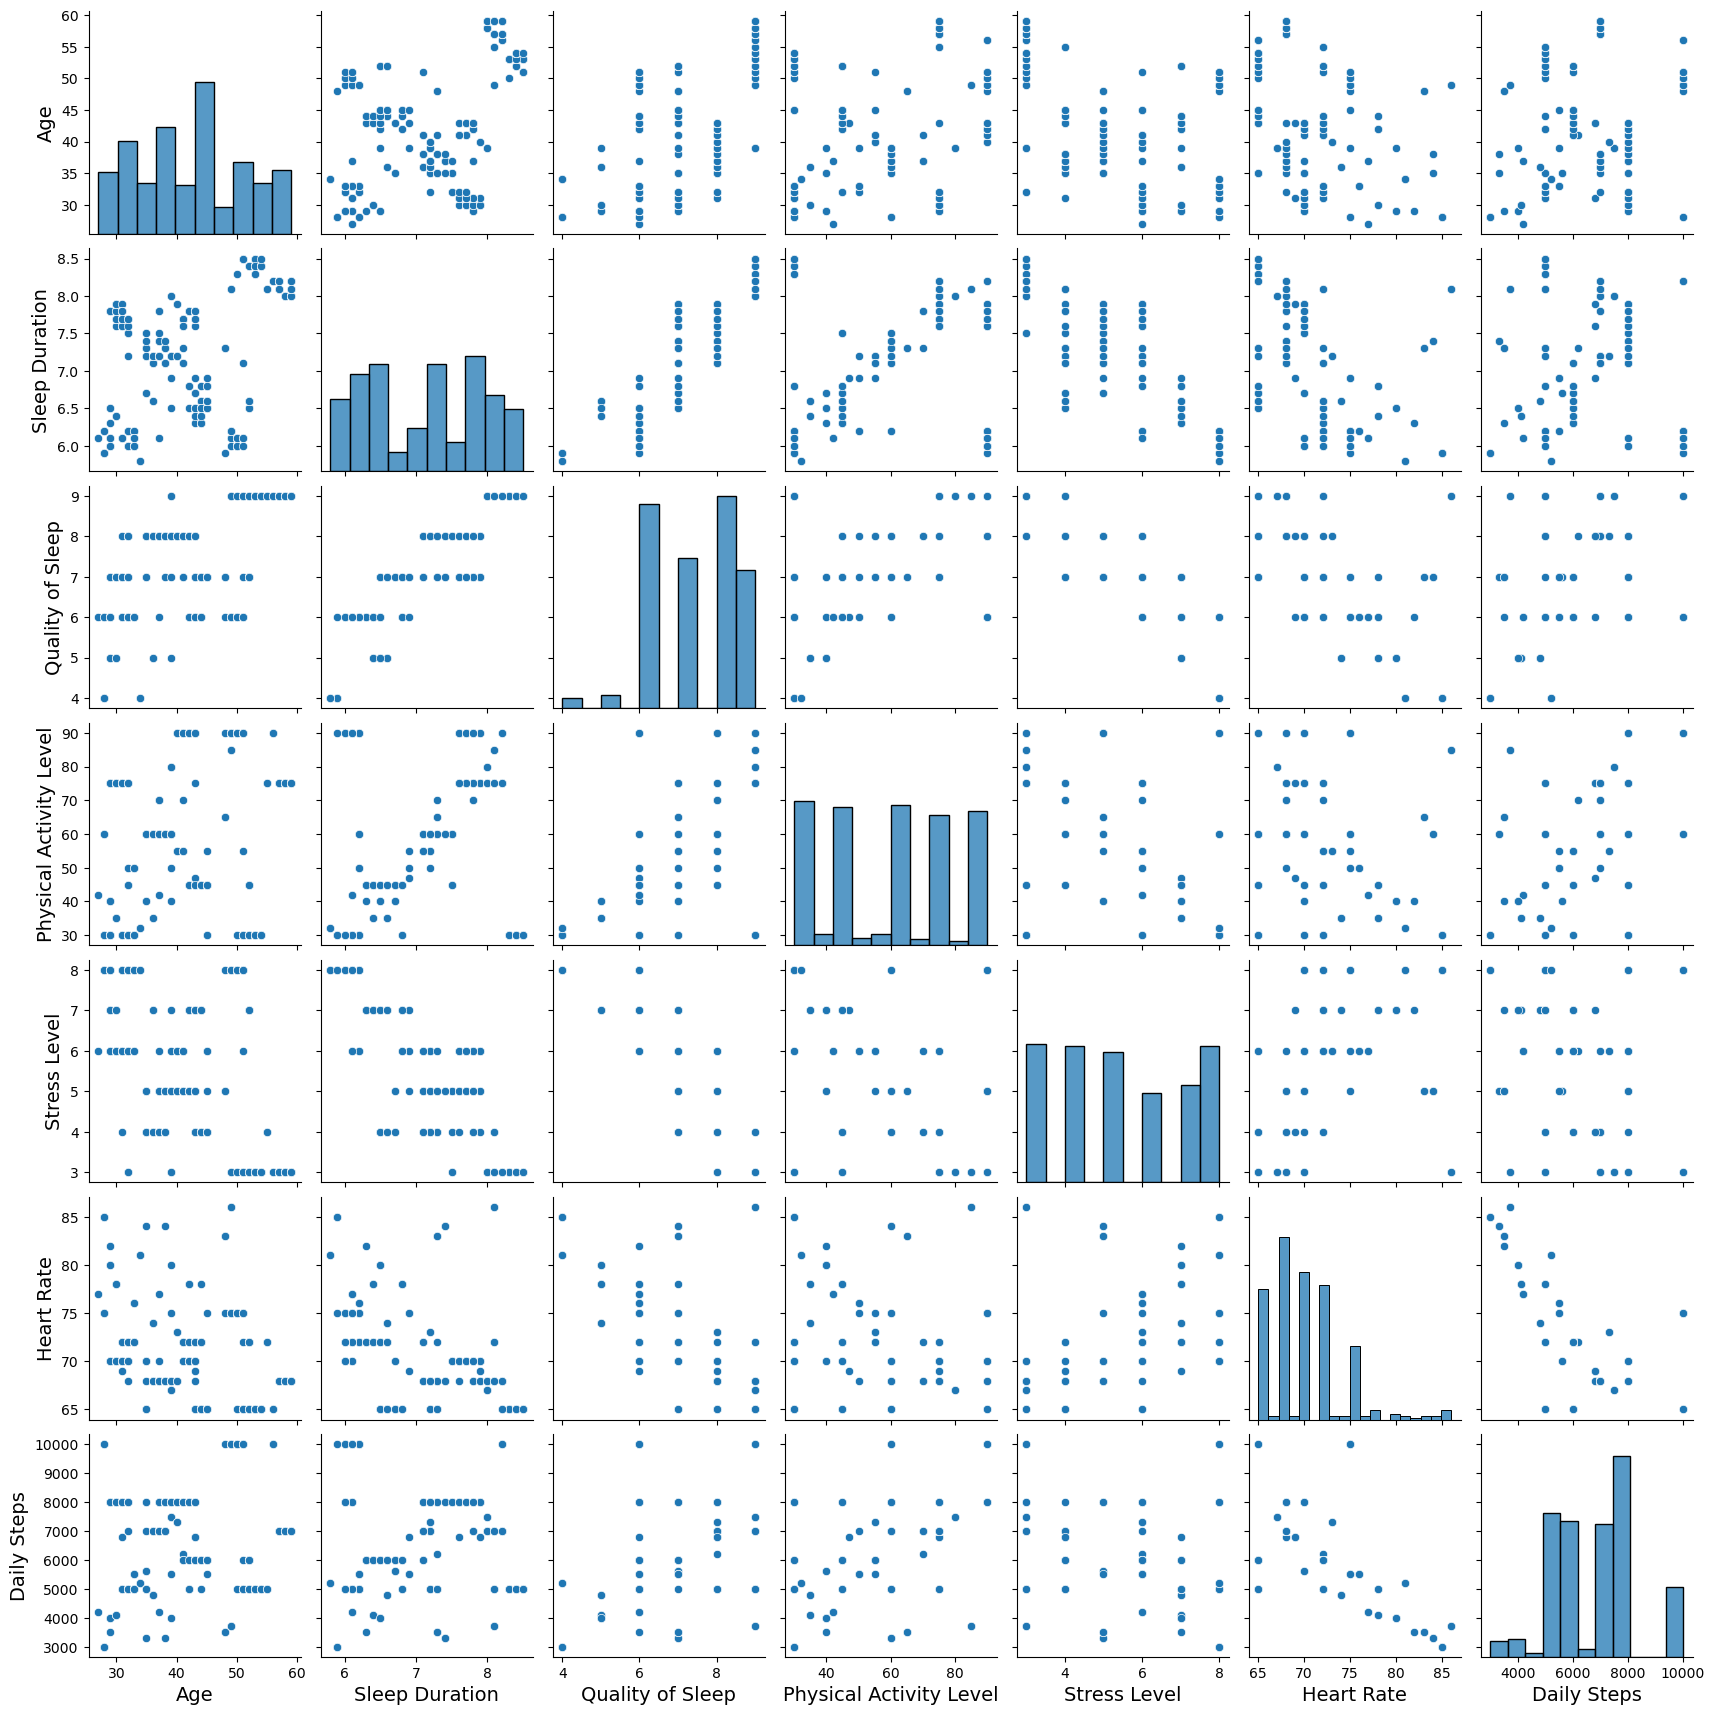

In [9]:
columns_for_scatter = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

sns.pairplot(health_df[columns_for_scatter])
plt.show()

### Experimenting with Attribute Combinations

In [10]:
# Splitting and converting 'Blood Pressure' into 'Systolic_BP' and 'Diastolic_BP'
health_df[['Systolic_BP', 'Diastolic_BP']] = health_df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Systolic_BP will contain the high blood pressure values
# Diastolic_BP will contain the low blood pressure values

In [11]:
# Creating Ratio Features
health_df['Steps_per_Age'] = health_df['Daily Steps'] / health_df['Age']

# Creating Difference Features
health_df['BP_Difference'] = health_df['Systolic_BP'] - health_df['Diastolic_BP']


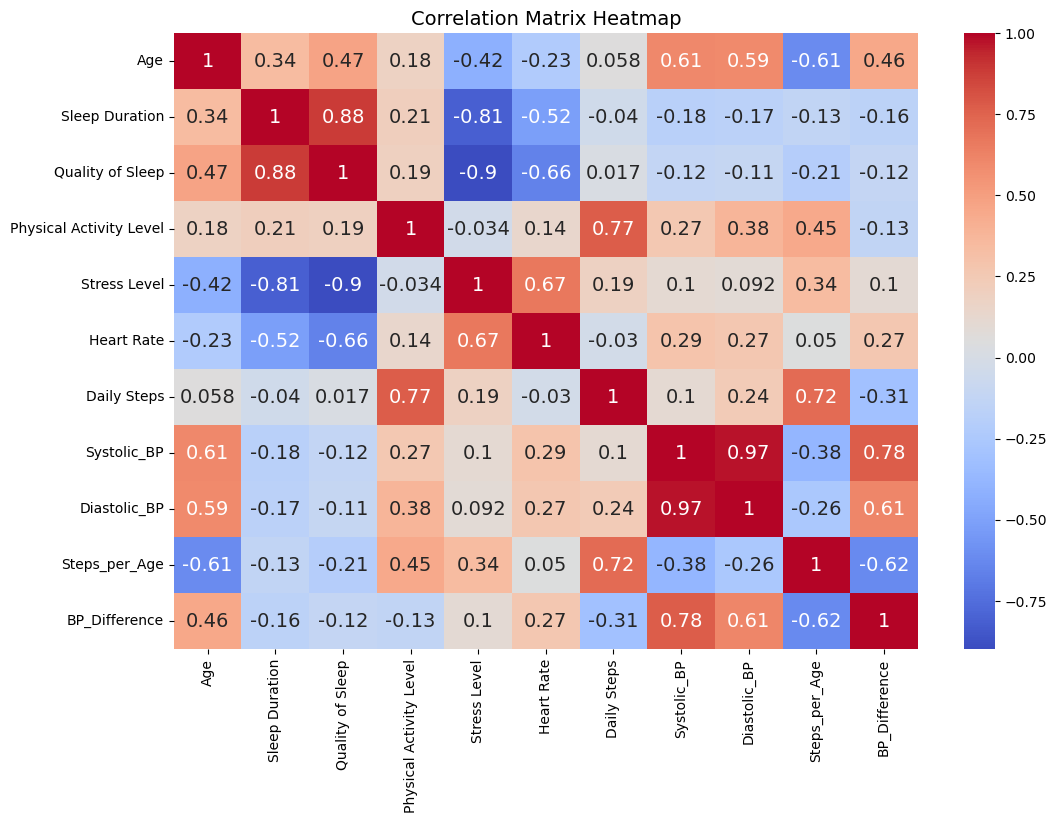

In [12]:
corr_matrix = health_df[['Age', 'Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level','Heart Rate','Daily Steps','Systolic_BP','Diastolic_BP'
                         ,'Steps_per_Age', 'BP_Difference']].corr()
plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Stress Level, Quality of Sleep, and Sleep Duration: These variables showed a strong correlation. This suggests that they share a substantial amount of common variance and, in essence, provide overlapping information regarding sleep patterns and their impact on health.

Diastolic_BP and Systolic_BP: There was a high degree of correlation observed between these two blood pressure measurements. Given that they are different aspects of the same physiological phenomenon, this strong relationship is expected.

Removal of 'Stress Level' and 'Quality of Sleep': Given their high inter-correlation and potential redundancy, I decided to remove these variables from the analysis. This decision was also backed by the consideration that 'Sleep Duration', the remaining variable, encapsulates the essential aspects of sleep relevant to the prediction goal.

Removal of 'Diastolic_BP': Since the primary objective is to predict blood pressure, and the systolic and diastolic measurements are highly correlated, I chose to retain only 'Systolic_BP' in our model. Systolic blood pressure is often prioritized in clinical settings for diagnosing hypertension and assessing cardiovascular risk.

In [13]:
health_df = health_df.drop(['Stress Level','Quality of Sleep','Diastolic_BP'], axis=1)

## Prepare the Data for Machine Learning Algorithms

### Missing Value



In [14]:
null_rows_idx = health_df.isnull().any(axis=1)
health_df.loc[null_rows_idx].head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Steps_per_Age,BP_Difference


### Outlier Detection

In [15]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(health_df[['Age', 'Sleep Duration','Physical Activity Level','Heart Rate','Daily Steps','Systolic_BP'
                         ,'Steps_per_Age', 'BP_Difference']])

In [16]:
outlier_pred

array([-1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

### Handling Text and Categorical Attributes

In managing the textual and categorical attributes within the dataset, distinct encoding strategies were employed for different variables. For the 'Gender' and 'BMI Category' attributes, a Label Encoding approach was utilized. This method assigns a unique integer to each category, thus effectively transforming these categorical texts into a numerical format suitable for model processing. In contrast, for the 'Occupation' and 'Sleep Disorder' variables, One-Hot Encoding was implemented. This technique creates new binary columns for each category in the original attribute, allowing the model to recognize and utilize these categorical features without imposing any ordinal relationship.

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
health_df['Gender_encoded'] = label_encoder.fit_transform(health_df['Gender'])
health_df['BMI_Category_encoded'] = label_encoder.fit_transform(health_df['BMI Category'])

health_df = pd.get_dummies(health_df, columns=['Occupation', 'Sleep Disorder'])



In [18]:
health_df = health_df.drop(['Gender','BMI Category','Blood Pressure'], axis=1)

In [19]:
health_df = health_df.drop(['Person ID'], axis=1)

## Select and Train a Model

Random Forest and Ridge Regression models were chosen for their robustness in handling complex, nonlinear data. Random Forest is advantageous for its ability to manage high-dimensional data, while Ridge Regression is effective in preventing overfitting, particularly in the presence of multicollinearity.

In [20]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [21]:
train_set, test_set = train_test_split(health_df, test_size=0.2, random_state=42)
X_train = train_set.drop('Systolic_BP', axis=1)
y_train = train_set['Systolic_BP']
X_test = test_set.drop('Systolic_BP', axis=1)
y_test = test_set['Systolic_BP']


In [22]:
np.random.seed(42)
pipelines = {
    'linear': Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())]),
    'ridge': Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())]),
    'lasso': Pipeline([('scaler', StandardScaler()), ('regressor', Lasso())]),
    'random_forest': Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor())])
}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{name} RMSE: {rmse}")

    neg_mse = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-neg_mse)
    print(f"{name} - Cross-validated Mean RMSE: {rmse_scores.mean()}, Std RMSE: {rmse_scores.std()}")

linear RMSE: 0.8815639474089223
linear - Cross-validated Mean RMSE: 3412656319691.1006, Std RMSE: 6825312639378.473
ridge RMSE: 0.870116382756708
ridge - Cross-validated Mean RMSE: 1.7921755932806533, Std RMSE: 0.2866662785221752
lasso RMSE: 2.156449647289869
lasso - Cross-validated Mean RMSE: 2.6399247518803515, Std RMSE: 0.15400456368886778
random_forest RMSE: 0.7562292421393573
random_forest - Cross-validated Mean RMSE: 1.1687213045840283, Std RMSE: 0.37245515152166137


## Model Evaluation
In evaluating the performance of the various models employed in this project, several key metrics were considered, particularly focusing on the Root Mean Square Error (RMSE) and cross-validated RMSE results. The RMSE is a standard measure used to quantify the difference between the predicted values by a model and the actual values. A lower RMSE indicates better model performance.

#### Linear Regression Model:

RMSE: The linear regression model achieved an RMSE of 0.8815639474089223. This value suggests a moderate level of prediction error.

Cross-validated RMSE: The cross-validated mean RMSE was extremely high at 3,412,656,319,691.1006 with a standard deviation of 6,825,312,639,378.473. This unusually high RMSE and standard deviation indicate potential overfitting or other issues in the model's performance during cross-validation.


#### Ridge Regression Model:

RMSE: The Ridge Regression model showed an improvement over the linear model with an RMSE of 0.870116382756708.

Cross-validated RMSE: The cross-validated mean RMSE was 1.7921755932806533, with a standard deviation of 0.2866662785221752. These values indicate a more consistent and reliable performance compared to the linear model.

#### Lasso Regression Model:

RMSE: The Lasso model had an RMSE of 2.156449647289869, which is considerably higher than both the linear and Ridge models.

Cross-validated RMSE: The cross-validated mean RMSE was 2.6399247518803515 with a standard deviation of 0.15400456368886778, suggesting less reliable predictions.

#### Random Forest Model:

RMSE: The Random Forest model outperformed the other models with an RMSE of 0.7562292421393573, indicating the highest accuracy among the tested models.

Cross-validated RMSE: The cross-validated mean RMSE was 1.1687213045840283 with a standard deviation of 0.37245515152166137. Despite a slight increase from its non-cross-validated RMSE, these results still demonstrate a strong and consistent performance.

Based on these evaluations, the Random Forest model was determined to be the most effective for this dataset, exhibiting the lowest RMSE and a strong performance even under cross-validation conditions. This model's ability to handle complex non-linear relationships within the data likely contributed to its superior predictive accuracy.

## Fine-Tune the Model

#### Grid Search

To optimize the model parameters, grid search technique was conducted. This process meticulously evaluated various parameter combinations to fine-tune the models for optimal performance. The results of this process revealed that the Ridge Regression model achieved a Test RMSE (Root Mean Square Error) of 0.870116382756708, while the Random Forest model demonstrated a more favorable Test RMSE of 0.7552370114125834. Given its superior performance as indicated by the lower RMSE value, the Random Forest model was selected as the preferred choice for predicting blood pressure.

In [23]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

ridge_pipeline = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
ridge_params = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge_model = ridge_grid.best_estimator_
print(f"Best Ridge Model: {ridge_grid.best_params_}")

rf_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
rf_params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
print(f"Best Random Forest Model: {rf_grid.best_params_}")

for name, model in [('Ridge', best_ridge_model), ('Random Forest', best_rf_model)]:
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{name} Test RMSE: {rmse}")

Best Ridge Model: {'ridge__alpha': 1}
Best Random Forest Model: {'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Ridge Test RMSE: 0.870116382756708
Random Forest Test RMSE: 0.7552370114125834


## Feature Importance Analysis

The Random Forest model provided valuable insights into the relative importance of different features in predicting blood pressure. The feature importance scores represent the weight each feature contributes to the model's predictions. Higher scores indicate a greater influence on the model's output. Below is a detailed analysis of the most influential features:

BP_Difference (Importance: 0.492575): This feature, with almost half the importance score, is the most significant predictor in the model. It likely represents the difference in blood pressure readings, indicating its critical role in determining overall blood pressure levels.

BMI_Category_encoded (Importance: 0.203443): The encoded BMI category is the second most influential factor. This suggests that the BMI category, a key indicator of body weight and health, plays a substantial role in blood pressure levels.

Occupation_Nurse (Importance: 0.118836): Surprisingly, the occupation of being a nurse is a major predictor, possibly reflecting lifestyle or stress factors associated with this profession that impact blood pressure.

Physical Activity Level (Importance: 0.055741): This underscores the importance of physical activity in influencing blood pressure, aligning with general health knowledge.

Heart Rate (Importance: 0.040407): The heart rate's significance indicates a direct correlation with blood pressure, which is expected given their physiological interdependence.

Daily Steps (Importance: 0.022730): Reflecting a more general measure of physical activity, daily steps play a moderate role in predicting blood pressure.


In [24]:
feature_importances = best_rf_model.named_steps['rf'].feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                            Feature  Importance
6                     BP_Difference    0.492575
8              BMI_Category_encoded    0.203443
14                 Occupation_Nurse    0.118836
2           Physical Activity Level    0.055741
3                        Heart Rate    0.040407
4                       Daily Steps    0.022730
22       Sleep Disorder_Sleep Apnea    0.018438
5                     Steps_per_Age    0.012933
0                               Age    0.010120
19               Occupation_Teacher    0.009318
7                    Gender_encoded    0.005978
21              Sleep Disorder_None    0.003945
1                    Sleep Duration    0.001526
10                Occupation_Doctor    0.001110
11              Occupation_Engineer    0.001094
9             Occupation_Accountant    0.000549
20          Sleep Disorder_Insomnia    0.000482
16           Occupation_Salesperson    0.000423
15  Occupation_Sales Representative    0.000238
17             Occupation_Scientist    0

### Model Re-Evaluation Without BP_Difference

Given the significant influence of the BP_Difference feature, along with its high (0.78) but not exceeding the correlation threshold (0.80) with systolic blood pressure, a strategic decision was made to redevelop the model excluding this particular variable. This step aimed to assess the model's performance relying on other factors, ensuring that the predictive power wasn't overly dependent on this single attribute.

#### Adjusted Model and Results

The revised model, a Random Forest, was fine-tuned with optimal parameters identified as max_depth of 10, min_samples_split of 5, and n_estimators set to 100. The new configuration resulted in a Random Forest Test RMSE of 0.6684909164465187, indicating an improved prediction accuracy compared to the previous model including BP_Difference.

#### Feature Importance in the New Model
The recalibrated model highlighted a different set of influential features, with the following being the most significant:

BMI_Category_encoded (Importance: 0.565354): Now the most impactful predictor, the BMI category's encoded value takes a central role in determining blood pressure levels.

Occupation_Accountant (Importance: 0.094655) and Physical Activity Level (Importance: 0.091263): These factors emerged as more influential in the absence of BP_Difference, suggesting their more direct relationship with blood pressure.

Steps_per_Age (Importance: 0.060050) and Age (Importance: 0.057531): Indicating the relevance of age-adjusted physical activity and age itself.

Daily Steps (Importance: 0.031875) and Heart Rate (Importance: 0.028805): These continue to be significant but with relatively lower importance.

Other factors like occupation (Lawyer, Nurse), gender, and sleep disorder also show a measurable impact but to a lesser extent.

In [25]:
health_df = health_df.drop(['BP_Difference'], axis=1)
train_set, test_set = train_test_split(health_df, test_size=0.2, random_state=42)
X_train = train_set.drop('Systolic_BP', axis=1)
y_train = train_set['Systolic_BP']
X_test = test_set.drop('Systolic_BP', axis=1)
y_test = test_set['Systolic_BP']
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

ridge_pipeline = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
ridge_params = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge_model = ridge_grid.best_estimator_
print(f"Best Ridge Model: {ridge_grid.best_params_}")

rf_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
rf_params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
print(f"Best Random Forest Model: {rf_grid.best_params_}")

for name, model in [('Ridge', best_ridge_model), ('Random Forest', best_rf_model)]:
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{name} Test RMSE: {rmse}")
    
feature_importances = best_rf_model.named_steps['rf'].feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

Best Ridge Model: {'ridge__alpha': 1}
Best Random Forest Model: {'rf__max_depth': 10, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Ridge Test RMSE: 2.210532152884922
Random Forest Test RMSE: 0.6684909164465187
                            Feature  Importance
7              BMI_Category_encoded    0.565354
8             Occupation_Accountant    0.094655
2           Physical Activity Level    0.091263
5                     Steps_per_Age    0.060050
0                               Age    0.057531
4                       Daily Steps    0.031875
3                        Heart Rate    0.028805
11                Occupation_Lawyer    0.027186
13                 Occupation_Nurse    0.011804
6                    Gender_encoded    0.009194
20              Sleep Disorder_None    0.007465
18               Occupation_Teacher    0.007306
10              Occupation_Engineer    0.004172
1                    Sleep Duration    0.001941
14  Occupation_Sales Representative    0.000475
19          Sl

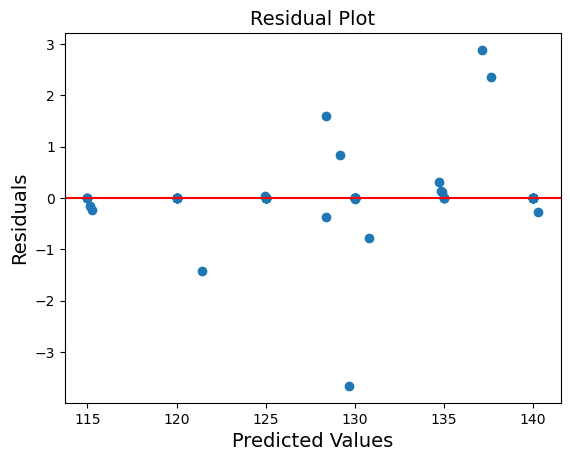

In [26]:
predictions_rf = best_rf_model.predict(X_test)
residuals = y_test - predictions_rf

import matplotlib.pyplot as plt
plt.scatter(predictions_rf, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

## Results and Insights

The analysis reveals insightful results aligned with the hypothesis that personal, health, and lifestyle factors significantly influence blood pressure. With a Test RMSE of 0.6684909164465187, the model demonstrates reasonable predictive accuracy. The most striking insight is the dominant influence of BMI, which, with an importance score of 0.565354, underscores the critical role of body weight management in blood pressure control. Interestingly, the model also highlights the impact of occupational factors, particularly in professions like Accounting, Law, and Nursing, suggesting that job-related stress and lifestyle choices play a significant role in influencing blood pressure. Physical Activity Level and Age emerge as other important factors, supporting the hypothesis that regular physical activity and age-specific health management are key to maintaining healthy blood pressure levels. While factors like heart rate, gender, and sleep disorders show lesser importance, their contribution to blood pressure dynamics cannot be overlooked.

Moving forward, these insights pave the way for several future directions in blood pressure management research. Enhancing the model's robustness through a larger and more diverse dataset, and including more detailed information such as dietary habits and genetic factors, could provide more nuanced understandings. Investigating the causality, particularly in the context of BMI and occupational stress, would further clarify these relationships. Furthermore, the implementation of intervention studies, especially focusing on weight management and occupational health programs, could test the practical applicability of these findings. The integration of technology, such as wearable health devices, in monitoring and managing health indicators in real-time, opens up new avenues for personalized healthcare. Finally, the collaboration between various disciplines, including data science, healthcare, and occupational health, is crucial for developing comprehensive and effective strategies for managing blood pressure in diverse populations.

## Model persistence using joblib

Save the final model:

In [28]:
from joblib import dump, load


dump(best_rf_model, 'random_forest_model.joblib')


loaded_model = load('random_forest_model.joblib')